<a href="https://colab.research.google.com/github/keynonymous/dimensionality_reduction/blob/main/PCA_LDA_FA_NN_Perbandingan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRINCIPAL COMPONENT ANALYSIS (PCA)**

In [145]:
import numpy as np
import pandas as pd

#baca dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cancer.csv')

In [146]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [147]:
dataset.shape

(569, 33)

In [148]:
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [149]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [150]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


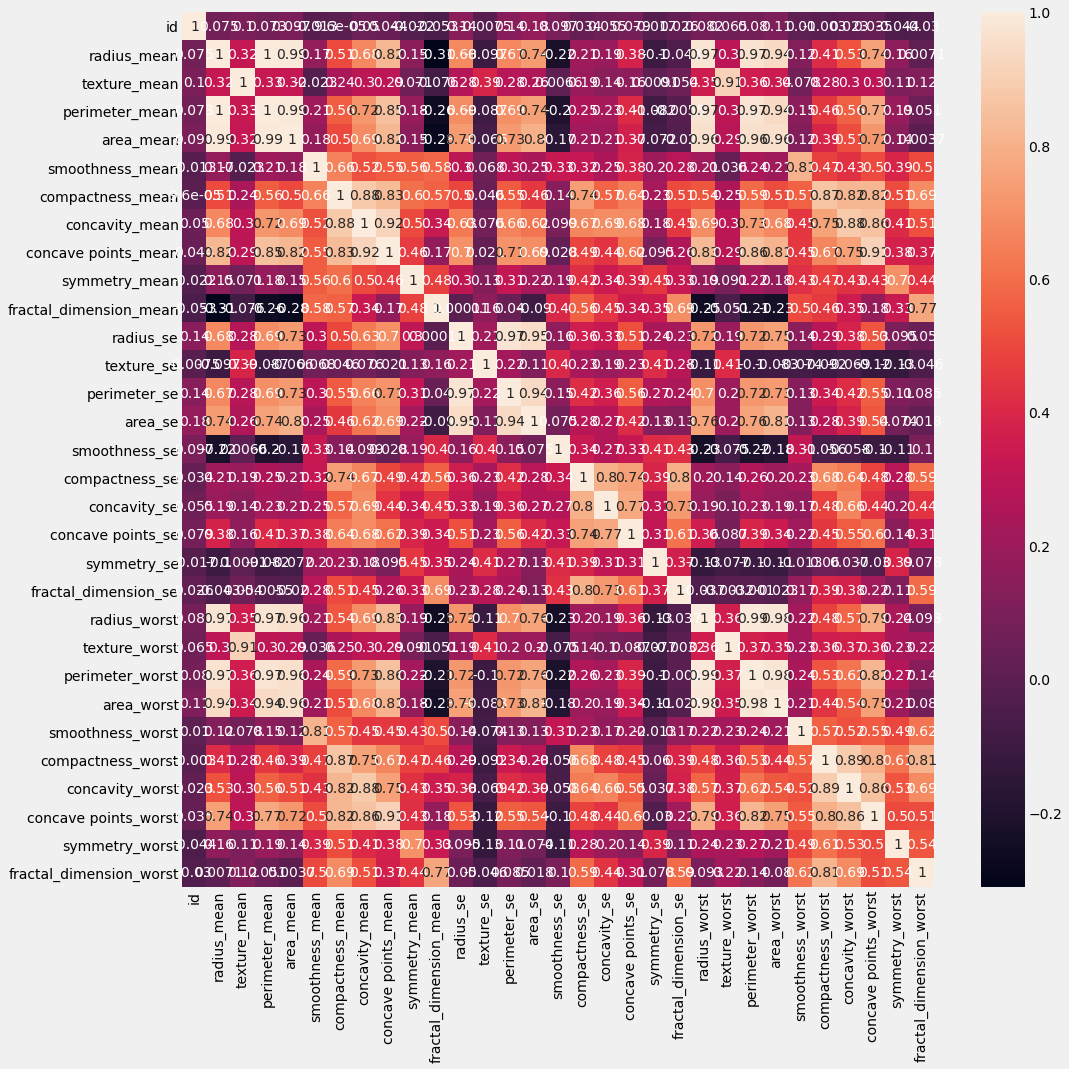

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.subplots(figsize=(15,15))
corr=dataset.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [152]:
#kita buat data (X) dan label nya (Y)
x=dataset.iloc[:, 2:31].values
y=dataset.iloc[:, 1].values

In [153]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [154]:
x.shape

(569, 29)

In [155]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(x)
# print(y_kmeans)

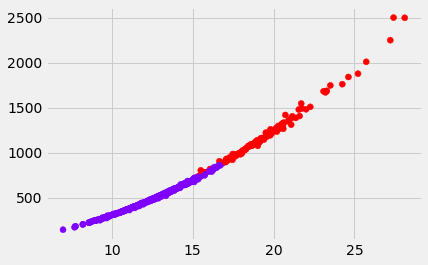

In [156]:
plt.scatter(x[:,0], x[:,3], c=y_kmeans, cmap='rainbow')
# plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,5], color='black')

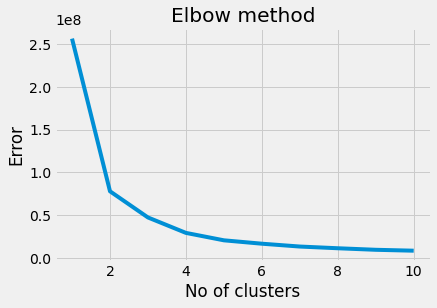

In [157]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [158]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [159]:
x.shape

(569, 29)

In [160]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,8.966336,1.984413
1,2.463064,-3.856484
2,5.777253,-0.841503
3,6.283637,9.494189
4,4.077171,-1.544879


In [161]:
pd_y = pd.DataFrame(y, columns = ['target'])
pd_y.head()

,target
0,M
1,M
2,M
3,M
4,M


In [162]:
finalDf = pd.concat([principalDf, pd_y[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,8.966336,1.984413,M
1,2.463064,-3.856484,M
2,5.777253,-0.841503,M
3,6.283637,9.494189,M
4,4.077171,-1.544879,M


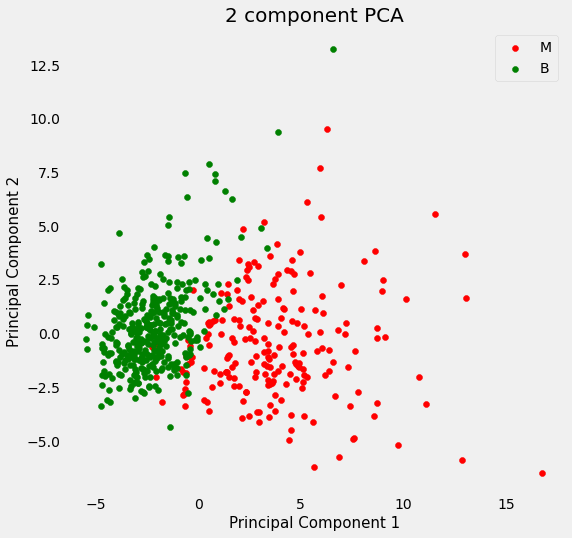

In [163]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [164]:
X2=dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
Y2=dataset[['diagnosis']]
y2=dataset['diagnosis'].replace(['M','B'],[1, 0]).copy()
Y2

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [165]:
X2 = StandardScaler().fit_transform(X2)

In [166]:
X2.shape

(569, 5)

In [167]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X2)
principalDf2 = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf2.head()

,principal component 1,principal component 2
0,3.370619,-1.099020
1,3.920194,0.160186
2,3.383389,0.147749
3,-1.189340,-0.490839
4,3.574312,0.503281


In [168]:
 from sklearn.model_selection import train_test_split
 x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(principalDf2,y2,test_size=0.2)

In [169]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy')

In [170]:
model.fit(x_train_pca, y_train_pca,
          epochs=100,
          steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.7331
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.4043
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3301
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2963
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2787
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2331
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2262
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2122
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2238
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1992
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2211
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.2132
Epoch 13/100
10/10 [=================

In [171]:
score_pca = model.evaluate(x_test_pca, y_test_pca, verbose=0)
score_pca

0.15544164180755615

In [172]:
finalDf2 = pd.concat([principalDf2, dataset[['diagnosis']]], axis = 1)
finalDf2.head()

,principal component 1,principal component 2,diagnosis
0,3.370619,-1.099020,M
1,3.920194,0.160186,M
2,3.383389,0.147749,M
3,-1.189340,-0.490839,M
4,3.574312,0.503281,M


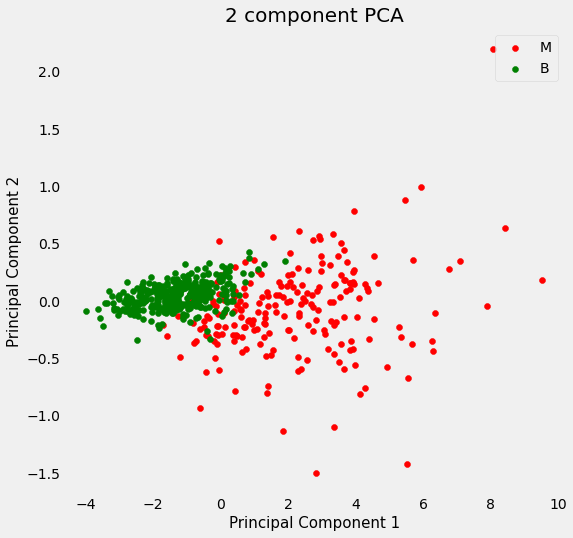

In [173]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['M', 'B']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf2['diagnosis'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

# **LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [174]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cancer.csv', sep=',')
dataset['diagnosis'] = dataset['diagnosis'].replace(['M','B'],[1, 0])
dataset = dataset.drop(columns=['Unnamed: 32'])

In [175]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [177]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split

In [178]:
x = dataset[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = dataset['diagnosis'].copy()

In [179]:
style.use('fivethirtyeight')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [180]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
print(x[0:5])

[[ 1.09706398  1.26993369  0.9843749   1.88668963  2.30360062]
 [ 1.82982061  1.68595471  1.90870825  1.80592744  1.53512599]
 [ 1.57988811  1.56650313  1.55888363  1.51187025  1.34747521]
 [-0.76890929 -0.59268717 -0.76446379 -0.28146446 -0.2499393 ]
 [ 1.75029663  1.77657315  1.82622928  1.29857524  1.33853946]]


In [181]:
class LDA:
    
    # Compare LDA with my PCA graph and see what is the difference between two
    # number_of_important_feature is the component axes in mathematical terms
    def __init__(self, number_of_important_features=2):
        self.number_of_important_features=number_of_important_features
        self.LDs=None
    
    def fit(self, X,y):
        feature_count=X.shape[1]
        # Getting unique classes in y
        type_of_class_in_y=np.unique(y)
        # Calculating mean of all samples
        mean_all=np.mean(X,axis=0)
        # Initialising with zeros these below matrix
        separation_within_class=np.zeros((feature_count,feature_count))
        separation_between_class=np.zeros((feature_count,feature_count))
        # Iterating over each type of unique classes of y
        for c in type_of_class_in_y:
            X_of_each_class=X[y==c]
            # Calculating the mean of each unique class
            mean_of_each_class=np.mean(X_of_each_class,axis=0)
            # Calculating separation within class(squared) and summing over it
            separation_within_class=separation_within_class+np.dot((X_of_each_class-mean_of_each_class).T,(X_of_each_class-mean_of_each_class))
            # Calculating difference between mean of each class with mean of overall samples
            mean_difference_with_overall_mean=(mean_of_each_class-mean_all).reshape(feature_count,1)
            # Calculating and summing over separation between classes
            separation_between_class=separation_between_class+(X.shape[0]*np.dot(mean_difference_with_overall_mean,mean_difference_with_overall_mean.T))
            # calculating these formula (d1(squared)+d2(squared)+d3(squared)..)/s1(squared)+s2(squared)+s3(squared)
            # separation_within_class(inverse)xseparation_between_class==>mat_trans
            mat_trans=np.dot(np.linalg.inv(separation_within_class),separation_between_class)
            # Same as PCA 
            # Refer to PCA for explanation and dimensions
            # Link https://www.kaggle.com/ankan1998/pca-from-scratch
            # Details on Eigenvectors
            # For more resources visit https://www.kaggle.com/getting-started/176613
            eigenvalues,eigenvector=np.linalg.eig(mat_trans)
            eigenvector=eigenvector.T
            indexs=np.argsort(eigenvalues)[::-1]
            eigenvector=eigenvector[indexs]
            eigenvalues=eigenvalues[indexs]
            self.LDs=eigenvector[:self.number_of_important_features]
            print(indexs)
            
    def apply(self,X):
        # Projecting on New Axis
        return np.dot(X,self.LDs.T)

In [182]:
lda = LDA(2)

In [183]:
lda.fit(x,y)

[0 1 2 3 4]
[0 2 3 4 1]


In [184]:
projected = lda.apply(x)
print(projected)

[[-0.40140378+0.j  0.355146  +0.j]
 [-0.1671347 +0.j -0.17938556+0.j]
 [-0.21964839+0.j -0.09063486+0.j]
 ...
 [-0.06719174+0.j -0.06685868+0.j]
 [-0.35961988+0.j  0.08875094+0.j]
 [ 0.24971648+0.j  0.11591614+0.j]]


In [185]:
 from sklearn.model_selection import train_test_split
 x_train_lda,x_test_lda,y_train_lda,y_test_lda=train_test_split(projected,y,test_size=0.2)

In [186]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy')

In [187]:
model.fit(x_train_lda, y_train_lda,
          epochs=100,
          steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6923
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6744
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6639
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6776
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6443
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6708
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6553
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6336
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6391
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6120
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5695
Epoch 12/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4970
Epoch 13/100
10/10 [=================

In [188]:
score_lda = model.evaluate(x_test_lda, y_test_lda, verbose=0)
print(score_lda)

0.26376816630363464


In [189]:
x0=projected[:,0]
x1=projected[:,1]

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


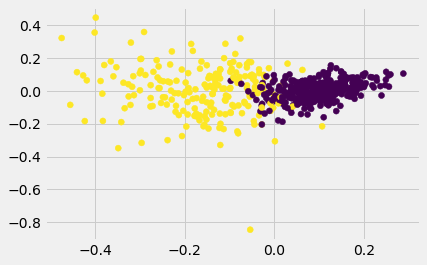

In [190]:
plt.scatter(x0,x1,c=y)

# **FACTOR ANALYSIS (FA)**

In [191]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_cancer.csv')
df = df.drop(columns=['Unnamed: 32'])
x = df[['radius_mean', 'perimeter_mean', 'area_mean', 'radius_worst', 'perimeter_worst']]
y = df['diagnosis'].replace(['M','B'],[1, 0]).copy()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [192]:
from sklearn.decomposition import FactorAnalysis
fact_an = FactorAnalysis(n_components=2)
x_factor = fact_an.fit_transform(x)

In [193]:
 from sklearn.model_selection import train_test_split
 x_train_fa,x_test_fa,y_train_fa,y_test_fa=train_test_split(x_factor,y,test_size=0.2)

In [194]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential()

input_layer = keras.layers.Dense(8,input_dim=2,activation='tanh')
model.add(input_layer)
hidden_layer = keras.layers.Dense(3,activation='sigmoid')
model.add(hidden_layer)
output_layer = keras.layers.Dense(1, activation='sigmoid')
model.add(output_layer)

sgd  = keras.optimizers.SGD(lr=1)
model.compile(optimizer=sgd,loss='binary_crossentropy')

In [195]:
model.fit(x_train_fa, y_train_fa,
          epochs=100,
          steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6675
Epoch 2/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5433
Epoch 3/100
10/10 [==============================] - 0s 1ms/step - loss: 0.3306
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2220
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1727
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1620
Epoch 7/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1736
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1546
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1760
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1854
Epoch 11/100
10/10 [==============================] - 0s 2ms/step - loss: 0.1884
Epoch 12/100
10/10 [==============================] - 0s 1ms/step - loss: 0.1292
Epoch 13/100
10/10 [=================

In [196]:
score_fa = model.evaluate(x_test_fa, y_test_fa, verbose=0)
print(score_fa)

0.17761579155921936


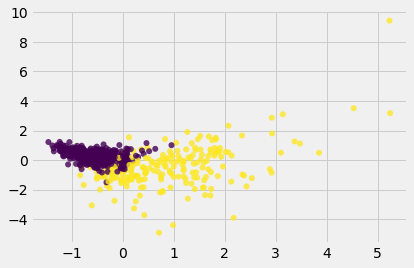

In [197]:
plt.scatter(x_factor[:,0],x_factor[:,1],c=y,alpha=.8,edgecolors='none')

# **Perbandingan Evaluate Score Klasifikasi Neural Network Antara PCA, LDA, FA**

In [198]:
print('Score PCA : ',score_pca,)
print('Score LDA : ',score_lda)
print('Score FA  : ',score_fa)

Score PCA :  0.15544164180755615
Score LDA :  0.26376816630363464
Score FA  :  0.17761579155921936
